# Data Scientist Associate 
## Example Practical Exam Solution

You can find the project information that accompanies this example solution in the resource center, [Practical Exam Resources](https://app.datacamp.com/certification/resource-center/practical-exam-resources).

Use this template to complete your analysis and write up your summary for submission.


## Data Validation

The dataset contains **200 rows and 9 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
 - Region: Same as description without missing values, 10 Regions.
 - Place name: Same as description without missing values.
 - Rating: 2 missing values, so I decided to remove the missing values.
 - Enough Reviews: Same as description without missing values.
 - Price: Same as description without missing values, 3 categories.
 - Delivery option: Same as description without missing values.
 - Dine in option: 50+ missing values, so I replace missing values with 'False', and convert it into boolean data type.
 - Take out option: 50+ missing values, so I replace missing values with 'False',and convert it into boolean data type.
 
After the data validation, the dataset contains **198 rows and 9 columns.**
 

### Original Dataset

In [7]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
df = pd.read_csv('coffee.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


### After removing the missing values for Rating and Review columns

In [8]:
df = df.dropna(subset=['Rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 14.1+ KB


### After replacing missing values with 'False'

In [3]:
df['Dine in option'] = df['Dine in option'].fillna(False)
df['Takeout option'] = df['Takeout option'].fillna(False)
df['Dine in option'] = df['Dine in option'].astype('bool')
df['Takeout option'] = df['Takeout option'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   198 non-null    bool   
 8   Takeout option   198 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.4+ KB


## Exploratory Analysis

From  **Graph 1 distribution of rating**, we see some outliers. Since we don't have a lot of data, we decided not to remove outliers at this point. Enough Reviews variable is our target variable. From **Graph 2**, we can see the proportion of the minority class - True, indicating having enough reviews, is about 37%. Therefore, the imbalanced class issue is mild, so we decided not to address this issue at this point.

From **investigating the relationship between the rating and target variable (Graph 3)**, we can see the rating variable might be a good indicator for prediction. Also, from **investigating different options (Graph 4-6)**, we can see the Dine in and Take out options are good indicators for prediction.

Finally, to enable model fitting, I have made the following changes:
- Remove the Place name column because it has unique values, so we won't use that feature.
- Convert all the categorical variables into numeric variables

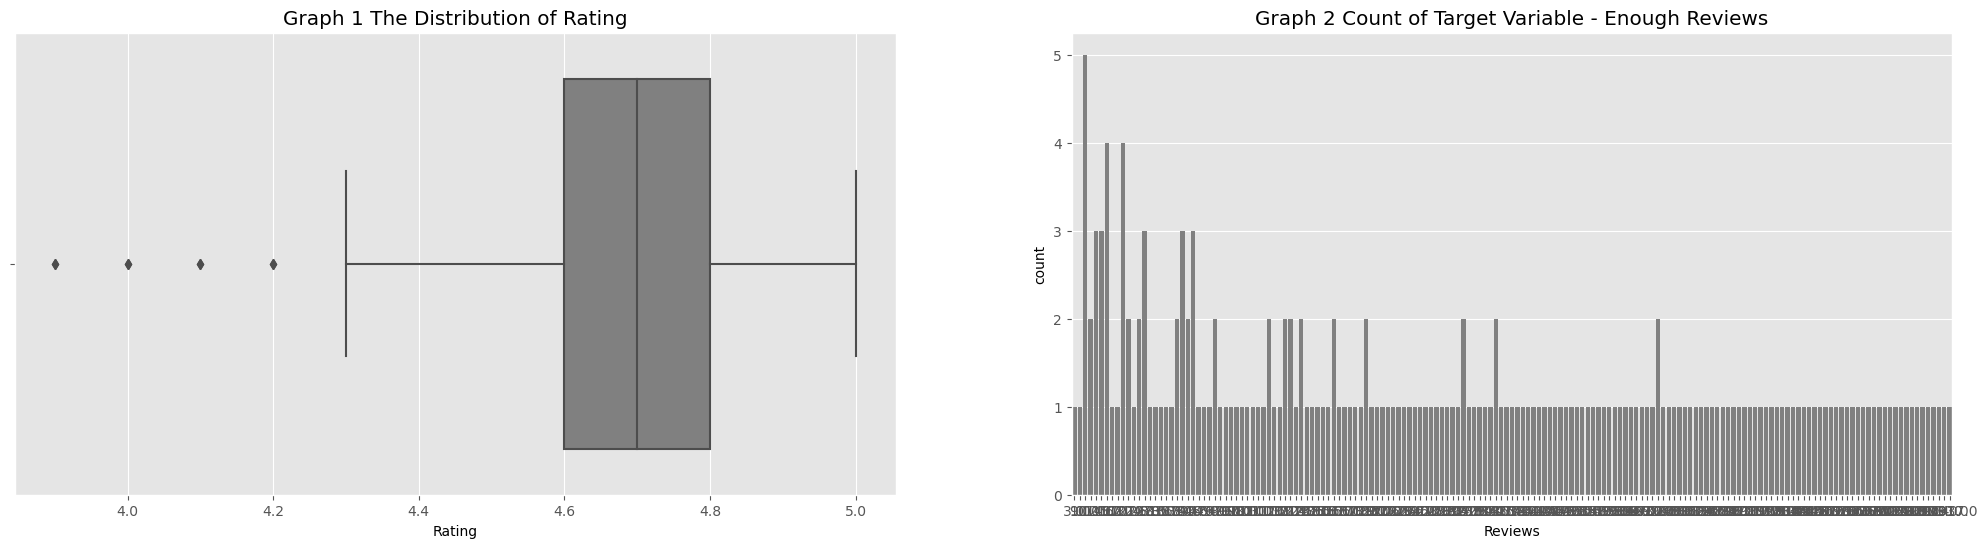

In [9]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize=(25,6))
sns.boxplot(x=df['Rating'],ax=axes[0],color='gray').set(title='Graph 1 The Distribution of Rating')
sns.countplot(x=df['Reviews'],ax=axes[1],color='gray').set(title='Graph 2 Count of Target Variable - Enough Reviews');

### Inspecting the Rating and Enough Reviews variables

### Inspecting the number of categories in categorical variables

In [10]:
#Inspect the categorical variables
df.select_dtypes(['object','bool']).nunique()

Region              10
Place name         185
Place type           4
Price                3
Delivery option      2
Dine in option       1
Takeout option       1
dtype: int64

### Inspecting the Relationships between Ratings, Options and Target Variable (Enough Reviews)

In [11]:
sns.boxplot(data=df, x='Enough Reviews',y='Rating',linewidth=0.8).set(title='Graph 3 Ratings vs Enough Reviews');

ValueError: Could not interpret input 'Enough Reviews'

In [ ]:
sns.boxplot(data=df, x='Enough Reviews',y='Rating',hue='Delivery option',linewidth=0.8).set(title='Graph 4 Ratings vs Enough Reviews in Delivery Option');

In [ ]:
sns.boxplot(data=df, x='Enough Reviews',y='Rating',hue='Dine in option',linewidth=0.8).set(title='Graph 5 Ratings vs Enough Reviews in Dine in Option');

In [ ]:
sns.boxplot(data=df, x='Enough Reviews',y='Rating',hue='Takeout option',linewidth=0.8).set(title='Graph 6 Ratings vs Enough Reviews in Takeout Option');

### Make changes to enable modeling

In [12]:
df = df.drop(columns=['Place name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place type       198 non-null    object 
 2   Rating           198 non-null    float64
 3   Reviews          198 non-null    float64
 4   Price            198 non-null    object 
 5   Delivery option  198 non-null    bool   
 6   Dine in option   140 non-null    object 
 7   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(5)
memory usage: 12.6+ KB


In [13]:
from sklearn import preprocessing
features = df.drop(columns='Enough Reviews')
X = pd.get_dummies(features, columns=['Place type','Price','Region','Delivery option','Dine in option','Takeout option'])
df['Enough Reviews'] = df['Enough Reviews'].replace({True:1,False:0})
y = df['Enough Reviews'] 

KeyError: "['Enough Reviews'] not found in axis"

## Model Fitting

Predicting whether a newly opened coffee shop can get over 450 reviews is a binary **classification problem** in machine learning. I am choosing the **Logistic Regression model** as a baseline model because it is very efficient to train and interpret. The comparison model I am choosing is the **Decision Tree model** because it works well with mixed data type and is less influenced by outliers.

In [14]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [15]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

NameError: name 'X' is not defined

### Method 1: Logistic Regression Model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

### Method 2: Decision Tree Model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Model Evaluation

I am choosing **accuracy** to evaluate the model because they are easy to interpret. Accuracy focuses on correct predictions of all predictions. 

The accuracy of the Logistic Regression model and Decision Tree model is 0.70 and 0.60, meaning the Logistic Regression model predicts more correctly whether a new coffee shop can get enough number of reviews after one year. 

From this metric, we can conclude that the **Logistic Regression model** has a higher chance of that prediction being correct.


### Evaluating Logistic Regression Model

In [ ]:
print(classification_report(y_test, y_pred_log))

### Evaluating Decision Tree Model

In [ ]:
print(classification_report(y_test, y_pred_clf))

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam